<a href="https://colab.research.google.com/github/hmm0403/TIL/blob/main/pagerank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graphs and PageRank in Python - Math

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G=nx.DiGraph()

In [ ]:
# a list of nodes:
pages = ["1","2","3","4"]
G.add_nodes_from(pages)

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['1', '2', '3', '4']
Edges of graph: 
[]


In [ ]:
G.add_edges_from([('1','2'), ('1','4'),('1','3'), ('4','1'),('2','3'),('2','4'),('3','1'),('4','3')])
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

# The function G.out_edges('node') returns the numbers of nodes 'node' links to.

print("Number of outward links for each node:")
for page in pages:
    print(["Page %s = %s"% (page,str(len(G.out_edges(page))))])

Nodes of graph: 
['1', '2', '3', '4']
Edges of graph: 
[('1', '2'), ('1', '4'), ('1', '3'), ('2', '3'), ('2', '4'), ('3', '1'), ('4', '1'), ('4', '3')]
Number of outward links for each node:
['Page 1 = 3']
['Page 2 = 2']
['Page 3 = 1']
['Page 4 = 2']


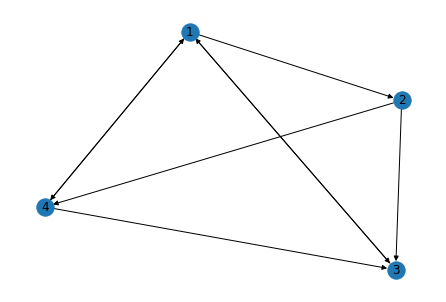

In [ ]:
nx.draw(G, with_labels = True)
plt.show() # display

In [ ]:
def findPageRank(linkmatrix,pages):
    eigval, eigvector= np.linalg.eig(linkmatrix)
    dominant_eigval = np.abs(eigval).max()
    PageRank= np.where(eigval == dominant_eigval)
    print("The most important node is %s"% str(pages[PageRank[0][0]]))
    
linkmatrix = np.matrix([[0,0,1,0.5],
                      [1.0/3,0,0,0],
                      [1.0/3,0,0.5,0.5],
                      [1.0/3,0,0.5,0]])
findPageRank(linkmatrix,pages)

The most important node is 2


['1:Office 366 = 1']
['2:Bottom of Spiral = 2']
['3:Soda Machine = 1']
['4:Office 326 = 3']
['5:Post Office = 2']
['6:Library = 2']
['7:Wall Across Room 441 = 2']
['8:Room 239 = 3']


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:474: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


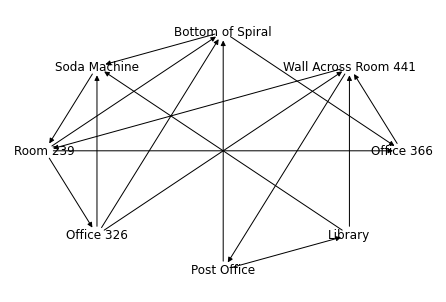

In [ ]:
G_Altgeld=nx.DiGraph()
locations = ["Office 366","Bottom of Spiral","Soda Machine","Office 326",
                  "Post Office","Library","Wall Across Room 441","Room 239"]
G.add_nodes_from(locations)
G_Altgeld.add_edges_from([('Office 366','Wall Across Room 441'),
                         ('Bottom of Spiral','Office 366'),('Bottom of Spiral','Soda Machine'),
                         ('Soda Machine','Room 239'),
                         ('Office 326','Soda Machine'),('Office 326','Bottom of Spiral'),('Office 326','Wall Across Room 441'),
                         ('Post Office','Bottom of Spiral'),('Post Office','Library'),
                         ('Library','Soda Machine'),('Library','Wall Across Room 441'),
                         ('Wall Across Room 441','Post Office'),('Wall Across Room 441','Room 239'),
                         ('Room 239', 'Office 366'),('Room 239','Bottom of Spiral'),('Room 239','Office 326')])
i = 0
for name in locations:
    i = i+1
    print(["%d:%s = %s"% (i,name,str(len(G_Altgeld.out_edges(name))))])
                
nx.draw_circular(G_Altgeld,node_color='', with_labels = True)
plt.show() # display|

In [ ]:
linkmatrix_Altgeld = np.matrix([[0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0]])
findPageRank(linkmatrix_Altgeld,locations)

The most important node is Office 366


In [24]:
from math import fabs
from time import time

data = open('web-Google.txt')
N =  875713
tax_rate = 0.8
eps = 1e-6
r = [1./N for i in range(N)]
r2 = [1./N for i in range(N)]
out_degree = [0 for i in range(N)]
m = [[] for i in range(N*2)]
hash_table = [-1 for i in range(N*2)]
idx = 0

def hash(x):
	global idx
	if hash_table[x] == -1:
		hash_table[x] = idx
		idx += 1
	return hash_table[x]

data.readline()
data.readline()
data.readline()
data.readline()
for line in data:
	x, y = map(hash, map(int, line.split()))
	out_degree[x] += 1
	m[y].append(x)

print('data loaded')
print('start iterating...')

t = 0
begin = time()

while True:
	for i in range(N):
		r[i] = 0
		for in_id in m[i]:
			r[i] += tax_rate * r2[in_id] / out_degree[in_id]
	der = 1 - sum(r)
	for i in range(N):
		r[i] += der / N

	tag = 0
	for i in range(N):
		if fabs(r[i]-r2[i]) > eps:
			tag = 1
			break
	for i in range(N):
		r2[i] = r[i]
	t += 1
	if tag == 0:
		break

end = time()
print(r[hash(99)])
print('total iteration is %d' % t)
print('total time is %f' % (end - begin))

IndexError: ignored

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#from utils import progress_bar_downloader
import os

pages_link = 'http://www.cs.ubc.ca/~nando/340-2009/lectures/pages.zip'
dlname = 'pages.zip'
#This will unzip into a directory called pages
if not os.path.exists('./%s' % dlname):
    progress_bar_downloader(pages_link, dlname)
    os.system('unzip %s' % dlname)
else:
    print('%s already downloaded!' % dlname)

NameError: ignored

In [31]:
#Quick and dirty link parsing as per http://www.cs.ubc.ca/~nando/540b-2011/lectures/book540.pdf
links = {}
for fname in os.listdir(dlname[:-4]):
    links[fname] = []
    f = open(dlname[:-4] + '/' + fname)
    for line in f.readlines():
        while True:
            p = line.partition('<a href="http://')[2]
            if p == '':
                break
            url, _, line = p.partition('\">')
            links[fname].append(url)
    f.close()

FileNotFoundError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_pages = len(links.keys())
G = np.zeros((num_pages, num_pages))

#Assign identity numbers to each page, along with a reverse lookup
idx = {}
lookup = {}
for n,k in enumerate(sorted(links.keys())):
    idx[k] = n
    lookup[n] = k

#Go through all keys, and add a 1 for each link to another page
for k in links.keys():
    v = links[k]
    for e in v:
        G[idx[k],idx[e]] = 1

#Add a small value (epsilon) to ensure a fully connected graph
eps = 1. / num_pages
G += eps * np.ones((num_pages, num_pages))
G = G / np.sum(G, axis=1)

In [ ]:
#Now we run the Markov Chain until it converges from random initialization
init = np.random.rand(1, num_pages)
init = init / np.sum(init)
probs = [init]
p = init
for i in range(100):
    p = np.dot(p, G)
    probs.append(p)

for i in range(num_pages):
    plt.plot([step[0, i] for step in probs], label=lookup[i], lw=2)
    
plt.legend()

In [ ]:
search = {}
for fname in os.listdir(dlname[:-4]):
    f = open(dlname[:-4] + '/' + fname)
    for line in f.readlines():
        #Ignore header lines
        if '<' in line or '>' in line:
            continue
        words = line.strip().split(' ')
        words = filter(lambda x: x != '', words)
        #Remove references like [1], [2]
        words = filter(lambda x: not ('[' in x or ']' in x), words)

    for word in words:
        if word in search:
            if fname in search[word]:
                search[word][fname] += 1
            else:
                search[word][fname] = 1
        else:
            search[word] = {fname: 1}
    f.close()

In [ ]:
def get_pr(fname):
    return probs[-1][0, idx[fname]]

r = search['film']
print(sorted(r, reverse=True, key=get_pr))